## 당뇨병 데이터로 다중회귀

- LinearRegression
- SVR
- RandomForestRegressor
    - 각각의 MSE 비교

#### 필요한 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 당뇨병 데이터 불러오기

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
# 필수 과정 아님
# 아래 MSE 값이 크게 나와 데이터 확인 차 한번 만들어봄
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target      # 연속 데이터
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


- 각 피쳐별 산점도와 선형회귀선

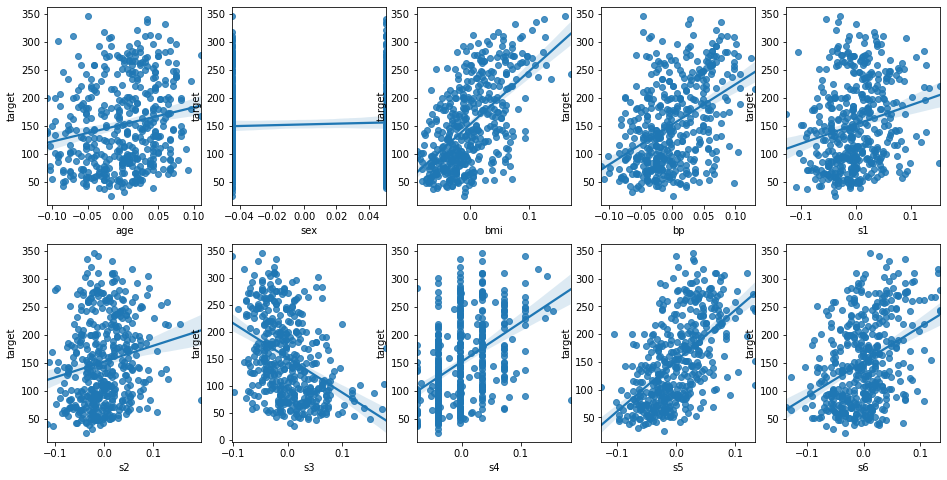

In [5]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5 # 나누는 수 컬럼(ncols)에 따름
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

- 각 피쳐별 R squared value

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1) 
    # df[feature] : Series -> 사이킷런에 2차원 데이터 입력해야 하므로 데이터 뽑아서 reshape함
    lr = LinearRegression()
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}: {r2:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


#### 학습/테스트 데이터 분류하기

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

##### 1. LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 객체 생성
lr.fit(X_train, y_train) # 학습 데이터로 훈련

LinearRegression()

In [16]:
pred_lr = lr.predict(X_test) # 학습된 분류기로 예측 by using 테스트 데이터

In [17]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr 
# y_test : 실제 데이터, pred_lr : 예측값 → 비교
# 손실함수 : 정답에 가까울수록 작은 값이 나온다. (여기서는 MSE 사용) 

2370.1978745563165

##### 2. SVR

In [18]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, pred_svr)
mse_svr

3960.9366880199996

##### 3. RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_rfr

3824.664311111111

#### MSE 비교

In [20]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr,
    'SVR':pred_svr, 'RF':pred_rfr 
})
df.head()

,y_test,LR,SVR,RF
0,155.0,156.031216,133.705341,111.79
1,167.0,185.700495,146.907788,144.81
2,185.0,162.863840,140.965960,175.52
3,109.0,162.545441,144.683128,154.34
4,65.0,78.518494,118.088552,96.48
